In [1]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as ipy

# Выщелачивание рудного компонента (11.2.3)


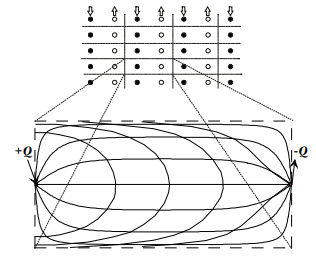

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
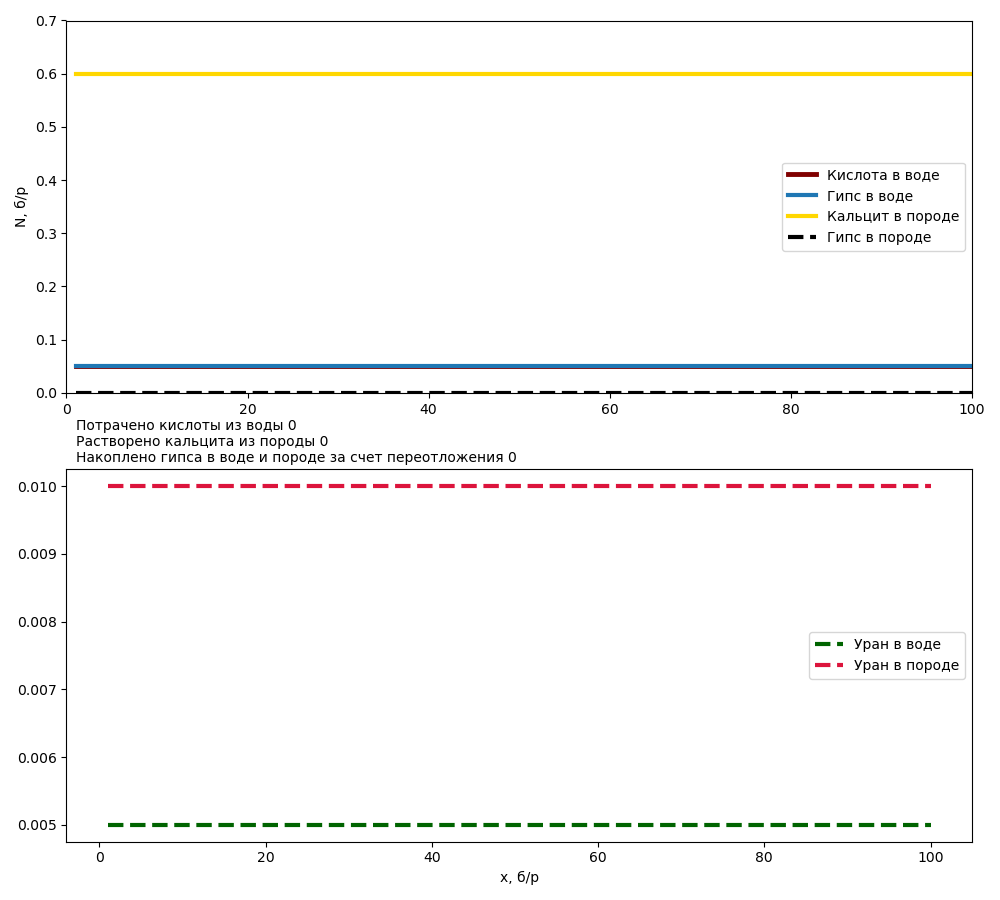

In [36]:
# set up parameters
zones_number = 5 # number of zones
number_comp = 6 # number of components in both water and rock
r_ini = 0.01
R_m = 0.05
R_ini = 0.005
G_ini = 0.05 # initial concentrations of gypsum in water
G_bound = 0.1 # boundary concentration of gypsum in water
#g_ini = 0.2 #initial concentration of gypsum in rock
G_m = 0.2 #
A_bound = 0.6 # boundary acid concentration
A_m = 0.4 # acid eq conc with calcite
A_ini  = 0.05
q_ini = 0.6  # calcite ini conc

#c_m = c_bound+n_ini# concentratopn of mineral in equlibrium with boundary solution
v = 0.3#  darcy velocity
n = 0.3 #porosity 
u = np.zeros((1, zones_number-1))
xx = np.zeros((1, zones_number-1))
uuu = v/n #transport velocity
u[0,0] = uuu/(1+(q_ini/(G_m-G_bound)))
u[0,1] = (uuu)/(1+(q_ini/(A_bound-A_m)))# frount 12
u[0,2]  = uuu  # front 23
time = np.arange(1,101)
x = np.arange(1,101)
conc1 = np.zeros((number_comp, x.size))# initiate concentration matrix
forybound = [v, q_ini,A_ini,A_m,A_bound,G_m,G_bound,G_ini,n, r_ini, R_m,R_ini ]
def transport2(t, conc2,v, q_ini,A_ini,A_bound,A_m,G_m,G_bound,G_ini,n, r_ini, R_m,R_ini):
        it = np.nditer(u, flags=['f_index'])
        r = r_ini+q_ini*(R_m-R_ini)/(A_bound-A_m)
        uuu = v/n 
        u[0,0] = uuu/(1+(q_ini/(G_m-G_bound)))
        u[0,1] = (uuu)/(1+(q_ini/(A_bound-A_m)))
        u[0,2]  = uuu  
        u[0,3] = uuu/(1+r/R_m) #####По сравнению с прошлым случаем добавлен фронт растворения урана. Он на самом деле идет раньше, просто что бы не менять структуру ссылок его прибавил в конце
        for uu in it:
            xx[0,it.index] = t*uu
       ##########################################Кислота
        conc2[0,0:int(np.round(xx[0,0]))] = A_bound
        conc2[0,int(np.round(xx[0,0])):int(np.round(xx[0,1]))] =  A_bound
        conc2[0,int(np.round(xx[0,1])):int(np.round(xx[0,2]))] = A_m
        conc2[0,int(np.round(xx[0,2])):] = A_ini
        #########################################Гипс растворенный
        conc2[1,0:int(np.round(xx[0,0]))] = G_bound
        conc2[1,int(np.round(xx[0,0])):int(np.round(xx[0,1]))] =  G_m
        conc2[1,int(np.round(xx[0,1])):int(np.round(xx[0,2]))] = G_m
        conc2[1,int(np.round(xx[0,2])):] = G_ini
        ##########################################Кальцит
        conc2[2,0:int(np.round(xx[0,0]))] = 0
        conc2[2,int(np.round(xx[0,0])):int(np.round(xx[0,1]))] =  0
        conc2[2,int(np.round(xx[0,1])):int(np.round(xx[0,2]))] = q_ini
        conc2[2,int(np.round(xx[0,2])):] = q_ini
        ######################################### Гипс в пооде
        conc2[3,0:int(np.round(xx[0,0]))] = 0
        conc2[3,int(np.round(xx[0,0])):int(np.round(xx[0,1]))] =  q_ini
        conc2[3,int(np.round(xx[0,1])):int(np.round(xx[0,2]))] =0
        conc2[3,int(np.round(xx[0,2])):] = 0
        ############################################ Уран в воде
        conc2[4,0:int(np.round(xx[0,3]))] = 0
        conc2[4,int(np.round(xx[0,3])):int(np.round(xx[0,1]))] =  R_m
        conc2[4,int(np.round(xx[0,1])):] = R_ini
        ############################################ Уран в породе
        conc2[5,0:int(np.round(xx[0,3]))] = 0
        conc2[5,int(np.round(xx[0,3])):int(np.round(xx[0,1]))] =  r
        conc2[5,int(np.round(xx[0,1])):] = r_ini
        return conc2, xx
fig = plt.figure(figsize=(10, 9))
ax5 = fig.add_subplot(2, 1, 1)
ax6 = fig.add_subplot(2, 1, 2)
#transport(0,conc1)
line8, = ax5.plot(x, transport2(0,conc1,*forybound)[0][0,], label = 'Кислота в воде', linewidth = 3.5, color = "maroon")
line9, = ax5.plot(x, transport2(0,conc1,*forybound)[0][1,],label = 'Гипс в воде', linewidth = 3,color = "tab:blue")
line10, = ax5.plot(x, transport2(0,conc1,*forybound)[0][2,], label = 'Кальцит в породе', linewidth = 3, color = "gold")
line11, = ax5.plot(x, transport2(0,conc1,*forybound)[0][3,],'--',label = 'Гипс в породе', linewidth = 3,color = "black")
line12, = ax6.plot(x, transport2(0,conc1,*forybound)[0][4,],'--',label = 'Уран в воде', linewidth = 3,color = "darkgreen")
line13, = ax6.plot(x, transport2(0,conc1,*forybound)[0][5,],'--',label = 'Уран в породе', linewidth = 3,color = "crimson")
ann = ax5.annotate("Потрачено кислоты из воды "+str(0), (1, -0.07),annotation_clip=False)# неправильно, лень переделывать
ann1 = ax5.annotate("Растворено кальцита из породы "+str((0)*(0)), (1, -0.1),annotation_clip=False,)
ann2 = ax5.annotate("Накоплено гипса в воде и породе за счет переотложения "+str((0)*(0)), (1, -0.13),annotation_clip=False)
out = ipy.Output()
plt.legend()
ax5.set_xlim([0,conc1[1,].size])
ax5.set_ylim([0, max(forybound)+0.1])
ax5.set_ylabel('C, б/р')
ax5.set_ylabel('N, б/р')
ax6.set_xlabel('x, б/р')
ax6.legend()#loc='center left',bbox_to_anchor=(1,0))
ax5.legend()
plt.tight_layout()
def update2(time,v, q_ini,A_m,A_bound,G_m,G_bound,G_ini,n, r_ini, R_m,R_ini ):
    with out:
#        transport(tt,conc1)
        sliders_values_num__ = [slider_v__.value,slider_q_ini_.value,A_ini ,slider_A_bound_.value,slider_A_m_.value,slider_G_m_.value,slider_G_bound_.value,slider_G_ini_.value,slider_n__.value,slider_r_ini.value,slider_R_m.value,slider_R_ini.value]
        line8.set_data(x, transport2(sliderrr_.value,conc1,*sliders_values_num__)[0][0,])
        line9.set_data(x, transport2(sliderrr_.value,conc1,*sliders_values_num__)[0][1,])
        line10.set_data(x, transport2(sliderrr_.value,conc1,*sliders_values_num__)[0][2,])
        line11.set_data(x, transport2(sliderrr_.value,conc1,*sliders_values_num__)[0][3,])
        line12.set_data(x, transport2(sliderrr_.value,conc1,*sliders_values_num__)[0][4,])
        line13.set_data(x, transport2(sliderrr_.value,conc1,*sliders_values_num__)[0][5,])
        ann.set_text("Потрачено кислоты из воды "+str(np.round((transport2(sliderrr_.value,conc1,*sliders_values_num__)[1][0,2]-transport2(sliderrr_.value,conc1,*sliders_values_num__)[1][0,1])*(A_bound-A_m))))
        ann1.set_text("Растворено кальцита из породы "+str(np.round((transport2(sliderrr_.value,conc1,*sliders_values_num__)[1][0,1])*(q_ini))))
        ann2.set_text("Накоплено гипса в воде и породе за счет переотложения "+str(np.round((transport2(sliderrr_.value,conc1,*sliders_values_num__)[1][0,1]-transport2(sliderrr_.value,conc1,*sliders_values_num__)[1][0,0])*(q_ini)+(G_m-G_bound)*(transport2(sliderrr_.value,conc1,*sliders_values_num__)[1][0,2]-transport2(sliderrr_.value,conc1,*sliders_values_num__)[1][0,0]))))
        ax5.set_ylim([0, max(*sliders_values_num__[1:-1])+0.1])
        ax6.set_ylim([0, max(*sliders_values_num__[-3:])+0.01]) 
        fig.canvas.draw_idle()
        

sliderrr_ = ipy.IntSlider(min = 0, max = 100,value=0)
slider_v__ = ipy.FloatSlider(min = 0, max = 3, step = 0.1, value=0.3)
slider_q_ini_ = ipy.FloatSlider(min = 0, max = 1, step = 0.05, value=0.2)
#slider_A_ini_ = ipy.FloatSlider(min = 0, max = 1, step = 0.05, value=0.1)
slider_A_bound_ = ipy.FloatSlider(min = 0.5, max = 1, step = 0.05, value=0.50)
slider_A_m_= ipy.FloatSlider(min = 0.05, max = 0.45, step = 0.05, value=0.20)
slider_G_m_= ipy.FloatSlider(min = 0.5, max = 1, step = 0.05, value=0.55)
slider_G_bound_= ipy.FloatSlider(min = 0, max = 0.45, step = 0.05, value=0.45)
slider_G_ini_ = ipy.FloatSlider(min = 0, max = 0.45, step = 0.05, value=0.25)
slider_n__= ipy.FloatSlider(min = 0.05, max = 1, step = 0.05, value=0.3)
slider_R_ini= ipy.FloatSlider(min = 0.001, max = 0.01, step = 0.001, value=0.001)
slider_R_m= ipy.FloatSlider(min = 0.02, max = 0.08, step = 0.01, value=0.02)
slider_r_ini= ipy.FloatSlider(min = 0.001, max = 0.01, step = 0.001, value=0.005)




widget = ipy.interactive(update2, time = sliderrr_ ,v = slider_v__,q_ini=slider_q_ini_ ,A_bound=slider_A_bound_,A_m=slider_A_m_, G_m=slider_G_m_, G_bound=slider_G_bound_,G_ini=slider_G_ini_ ,n=slider_n__,R_ini =slider_R_ini ,R_m =slider_R_m,r_ini=slider_r_ini)
layout = ipy.Layout(
#     display = 'flex',
 #                   flex_flow = 'column',
#                    justify_content = 'space-between',
#                    align_items = 'center',
                   )
layout2 = ipy.Layout(
#     display = 'flex',
 #                   flex_flow = 'column',
#                    justify_content = 'space-between',
#                    align_items = 'center',
                   )
widgets = ipy.HBox(children=(sliderrr_, out,slider_v__, slider_R_ini,slider_R_m,slider_r_ini), layout = layout)
#widgets2 = ipy.HBox(children=(slider_G_m_, slider_G_bound_, slider_G_ini_, slider_n__,slider_R_ini,slider_R_m,slider_r_ini), layout = layout2)
display(widgets)
#display(widgets2)